In [1]:
import os
import sys
!{sys.executable} -m pip install tensorflow pandas numpy sklearn imread resize 
import tensorflow as tf

!{sys.executable} -m pip install pandas numpy sklearn imread #  resize
print (tf.__version__)
from platform import python_version

print(python_version())


  Using cached resize-0.1.0-py3-none-any.whl
  Using cached Pillow-5.3.0.tar.gz (15.6 MB)
  Preparing metadata (setup.py) ... done
  Using cached docopt-0.6.2-py2.py3-none-any.whl
  ERROR: Command errored out with exit status 1:
   command: /home/jordi/TFM/TFM/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-fg08f_vz/pillow_7e2e7e8eced54b5299df488e00bbe8c6/setup.py'"'"'; __file__='"'"'/tmp/pip-install-fg08f_vz/pillow_7e2e7e8eced54b5299df488e00bbe8c6/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-_4elby18
       cwd: /tmp/pip-install-fg08f_vz/pillow_7e2e7e8eced54b5299df488e00bbe8c6/
  Complete output (174 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  c

Failed to build Pillow
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.2.0
    Uninstalling Pillow-7.2.0:
      Successfully uninstalled Pillow-7.2.0
    Running setup.py install for Pillow ... error
    ERROR: Command errored out with exit status 1:
     command: /home/jordi/TFM/TFM/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-fg08f_vz/pillow_7e2e7e8eced54b5299df488e00bbe8c6/setup.py'"'"'; __file__='"'"'/tmp/pip-install-fg08f_vz/pillow_7e2e7e8eced54b5299df488e00bbe8c6/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-w1u9v0lu/install-record.txt --single-version-externally-managed --compile --install-headers /home/jordi/TFM/TFM/include/site/python3.8/Pillow
  

2.6.0
3.8.10


In [2]:
# Obtenemos lista de nombres de ficheros de secuencias ya pasadas letras a numérico borra ficheros vacíos
!pip install pandas

import pandas as pd
import numpy as np
import os
import shutil


#Ficheros para Train y validation
pathDataset = os.path.join("./datasetFlancoDerecho")

# Ficheros para el dataset de Test
pathTestDataset = os.path.join("./testDatasetFlancoDerecho")


# https://www.tensorflow.org/tutorials/load_data/images


In [3]:
!pip install pandas

import pandas as pd
import numpy as np
import os
import shutil
from tensorflow.keras.preprocessing import image_dataset_from_directory
import pathlib
lote = 128
dimensiones_imagenes= (20,40)
semilla=42


Train = image_dataset_from_directory(pathDataset,validation_split=0.2,
                                                 color_mode="grayscale", batch_size=lote, subset = "training", 
                                                 image_size=dimensiones_imagenes, seed = semilla)


classes = Train.class_names
print(classes)

Val = image_dataset_from_directory(pathDataset,validation_split=0.2,
                                                 color_mode="grayscale", batch_size=lote, subset = "validation", 
                                                 image_size=dimensiones_imagenes, seed = semilla) 
print(classes)

Found 2269833 files belonging to 2 classes.
Using 1815867 files for training.


2021-11-07 06:15:45.171809: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-07 06:15:45.215633: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-07 06:15:45.216415: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-07 06:15:45.218586: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

['ConAlu', 'SinAlu']
Found 2269833 files belonging to 2 classes.
Using 453966 files for validation.
['ConAlu', 'SinAlu']


In [4]:

Test = image_dataset_from_directory(pathTestDataset,validation_split=0.0,
                                                 color_mode="grayscale", batch_size=lote,  
                                                 image_size=dimensiones_imagenes, seed = semilla)

print(classes)

Found 398606 files belonging to 2 classes.
['ConAlu', 'SinAlu']


In [5]:
!pip install tensorflow-gpu

In [6]:
import tensorflow as tf
#tf.test.is_built_with_cuda()
#tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)
#tf.config.list_physical_devices('GPU')
#os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [7]:
for image_batch, labels_batch in Train:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

2021-11-07 06:16:18.337497: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


(128, 20, 40, 1)
(128,)


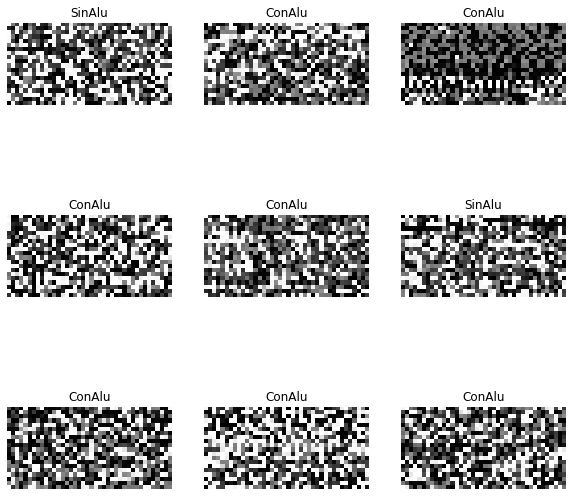

In [8]:
!pip install matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in Train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"),cmap='gray', vmin=0, vmax=255)
        plt.title(classes[labels[i]])
        plt.axis("off")


In [9]:
import numpy as np
import pandas as pd

#from skimage.io import imread
import imread
# from skimage.transform import resize
#!pip install resize

# import resize
import tensorflow as tf
# from tensorflow import keras
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)
print(tf.test.gpu_device_name())
print("?")
#config = tf.compat.v1.ConfigProto() 
#config.gpu_options.per_process_gpu_memory_fraction = 0.9
#tf.keras.backend.tensorflow_backend.set_session(tf.Session(config=config))
#gpu_devices = tf.config.experimental.list_physical_devices('GPU')
#for device in gpu_devices:
#    tf.config.experimental.set_memory_growth(device, True)


from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten,  Rescaling
from keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical

Num GPUs Available:  1
Physical devices cannot be modified after being initialized
/device:GPU:0
?


2021-11-07 06:16:19.567553: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-07 06:16:19.567834: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-07 06:16:19.567999: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-07 06:16:19.568207: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-07 06:16:19.568372: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [10]:
import tensorflow as tf
tf.test.gpu_device_name()

2021-11-07 06:16:19.573546: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-07 06:16:19.573786: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-07 06:16:19.573945: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-07 06:16:19.574141: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-07 06:16:19.574304: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

'/device:GPU:0'

In [11]:
Train= Train.prefetch(buffer_size=64)
Val= Val.prefetch(buffer_size=64)

In [12]:
model = Sequential()
### BASE MODEL

model.add(Rescaling(1./255,input_shape=(20,40,1)))
# PRIMERA CAPA CONVOLUCIONAL
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation ='relu',padding='same',input_shape=(20,40,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# SEGUNDA CAPA CONVOLUCIONAL
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same',activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3,3),  padding='same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# TERCERA CAPA CONVOLUCIONAL
model.add(Conv2D(filters = 256, kernel_size = (3,3),  padding='same', activation ='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters = 256, kernel_size = (3,3),  padding='same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

### TOP MODEL

model.add(Flatten())

model.add(Dense(256, activation = "relu")) #Fully connected layer
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation = "relu")) #Fully connected layer
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation = "sigmoid")) #Classification layer or output layer

model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['binary_accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 20, 40, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 20, 40, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 20, 40, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 40, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 20, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 20, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 10, 20, 64)        0

In [13]:
epocas=100


In [14]:
evolucionEntrenamiento = model.fit(Train, validation_data = Val, epochs= epocas)

Epoch 1/100


2021-11-07 06:16:21.654503: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8204
2021-11-07 06:16:22.854111: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-11-07 06:16:24.242387: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


14187/14187 [==============================] - 327s 23ms/step - loss: 0.4765 - binary_accuracy: 0.7484 - val_loss: 0.4398 - val_binary_accuracy: 0.7714
Epoch 2/100
14187/14187 [==============================] - 320s 23ms/step - loss: 0.4371 - binary_accuracy: 0.7742 - val_loss: 0.4226 - val_binary_accuracy: 0.7814
Epoch 3/100
14187/14187 [==============================] - 322s 23ms/step - loss: 0.4256 - binary_accuracy: 0.7817 - val_loss: 0.4134 - val_binary_accuracy: 0.7880
Epoch 4/100
14187/14187 [==============================] - 319s 23ms/step - loss: 0.4167 - binary_accuracy: 0.7879 - val_loss: 0.4027 - val_binary_accuracy: 0.7953
Epoch 5/100
14187/14187 [==============================] - 319s 23ms/step - loss: 0.4076 - binary_accuracy: 0.7948 - val_loss: 0.4005 - val_binary_accuracy: 0.7973
Epoch 6/100
14187/14187 [==============================] - 319s 22ms/step - loss: 0.3989 - binary_accuracy: 0.8007 - val_loss: 0.3862 - val_binary_accuracy: 0.8080
Epoch 7/100
14187/14187 [===

Epoch 51/100
14187/14187 [==============================] - 320s 23ms/step - loss: 0.2307 - binary_accuracy: 0.9018 - val_loss: 0.1727 - val_binary_accuracy: 0.9377
Epoch 52/100
14187/14187 [==============================] - 319s 23ms/step - loss: 0.2299 - binary_accuracy: 0.9021 - val_loss: 0.1749 - val_binary_accuracy: 0.9365
Epoch 53/100
14187/14187 [==============================] - 319s 23ms/step - loss: 0.2280 - binary_accuracy: 0.9029 - val_loss: 0.1705 - val_binary_accuracy: 0.9383
Epoch 54/100
14187/14187 [==============================] - 319s 22ms/step - loss: 0.2272 - binary_accuracy: 0.9032 - val_loss: 0.1685 - val_binary_accuracy: 0.9410
Epoch 55/100
14187/14187 [==============================] - 320s 23ms/step - loss: 0.2258 - binary_accuracy: 0.9040 - val_loss: 0.1670 - val_binary_accuracy: 0.9413
Epoch 56/100
14187/14187 [==============================] - 319s 23ms/step - loss: 0.2251 - binary_accuracy: 0.9044 - val_loss: 0.1617 - val_binary_accuracy: 0.9432
Epoch 57/1

14187/14187 [==============================] - 320s 23ms/step - loss: 0.1920 - binary_accuracy: 0.9206 - val_loss: 0.1208 - val_binary_accuracy: 0.9614


In [15]:
model.save("2021100flancoDerechoPadding")

2021-11-07 15:09:24.688939: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: 2021100flancoDerechoPadding/assets


In [16]:
score=model.predict(Test)


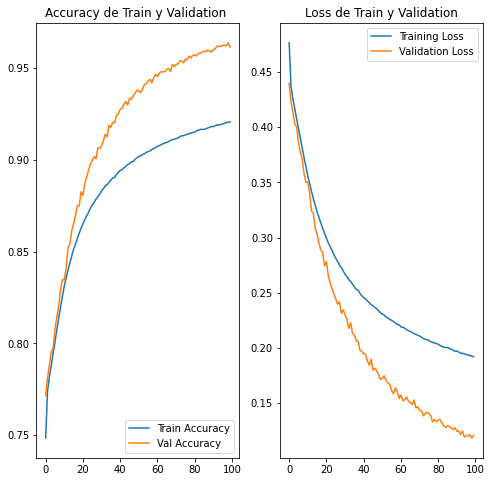

In [17]:
acc = evolucionEntrenamiento.history['binary_accuracy']
val_acc = evolucionEntrenamiento.history['val_binary_accuracy']

loss = evolucionEntrenamiento.history['loss']
val_loss = evolucionEntrenamiento.history['val_loss']

epochs_range = range(epocas)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy de Train y Validation ')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss de Train y Validation')
plt.show()

In [18]:
from keras.models import Sequential, Model, load_model # , evaluate, predict
score = model.evaluate(Test)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')


3115/3115 [==============================] - 22s 7ms/step - loss: 0.5709 - binary_accuracy: 0.7861
Test loss: 0.5709303021430969 / Test accuracy: 0.7861196398735046


In [19]:
score=model.predict(Test)

In [20]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
#print(type(Test))
print(Test.class_names)

#print(score.shape)
display(score.astype('int'))

labels = np.concatenate([y for x,y in Test]) #, axis=0)
print(labels)
print(type(labels))
#print(labels.shape)
#print(labels.argmax())
#print(score.argmax(axis=-1))
display(labels)

# print(np.argmax(score))
#print(classification_report(labels,score.argmax(axis=1), target_names=Test.class_names))
print(classification_report(labels,score.round()))
print(confusion_matrix(labels,score.round()))

['ConAlu', 'SinAlu']


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

[0 0 0 ... 0 0 1]
<class 'numpy.ndarray'>


array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

              precision    recall  f1-score   support

           0       0.72      0.68      0.70    286602
           1       0.28      0.32      0.30    112004

    accuracy                           0.58    398606
   macro avg       0.50      0.50      0.50    398606
weighted avg       0.60      0.58      0.59    398606

[[195719  90883]
 [ 76315  35689]]
